# Pymaceuticals Inc.
---

### Analysis

- A correlation coefficient (r value) of 0.84 indicates a strong correlation between mouse weight and average tumor volume. Therefore, it would be reasonable to conclude that mouse weight and average tumor volume are directly related. However, it is important to note that correlation does not necessarily imply causation, and additional research and analysis would be necessary to determine any causal relationship between mouse weight and tumor volume.

- Based on the plot displaying the tumor volume vs timepoint (days) for mouse l509, a reduction in tumor size can be observed for the treatment with capomulin. Specifically, the tumor volume appears to decrease from approximately 45mm3 at the start of the treatment to approximately 41.5mm3 at the end of the treatment period. This suggests that capomulin may be effective in reducing the size of tumors in mice. It is important to note that this analysis is based on a single mouse, and further research would be necessary to determine the effectiveness of capomulin in treating tumors across a larger sample size.

- As shown in the boxplot and final tumor volume data, the two most effective treatments in terms of reducing tumor volume among the tested were Capomulin and Ramicane, indicating a greater consistency in their effectiveness across multiple mice. These findings suggest that Capomulin and Ramicane are promising options for further research.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.metrics import r2_score

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
# Display the data table for preview
merged_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Display the data table for the first timepoint
first_df = merged_df[merged_df["Timepoint"] == 0]
first_df = first_df.reset_index(drop=True)
first_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated_rows = merged_df[duplicates]
duplicated_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dropped_df = merged_df[merged_df['Mouse ID'] == 'g989']
dropped_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = clean_df.groupby(["Drug Regimen"])
regimen_mean_df = regimen_group.mean()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_median_df = regimen_group.median()
regimen_variance_df = regimen_group.var()
regimen_std_df = regimen_group.std()
regimen_sem_df = regimen_group.sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_summary = pd.DataFrame(regimen_mean_df ["Tumor Volume (mm3)"])
regimen_summary = regimen_summary.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})
regimen_summary["Median Tumor Volume"] = pd.DataFrame(regimen_median_df["Tumor Volume (mm3)"])
regimen_summary["Tumor Volume Variance"] = pd.DataFrame(regimen_variance_df["Tumor Volume (mm3)"])
regimen_summary["Tumor Volume Std. Dev."] = pd.DataFrame(regimen_std_df["Tumor Volume (mm3)"])
regimen_summary["Tumor Volume Std. Err."] = pd.DataFrame(regimen_sem_df["Tumor Volume (mm3)"])
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

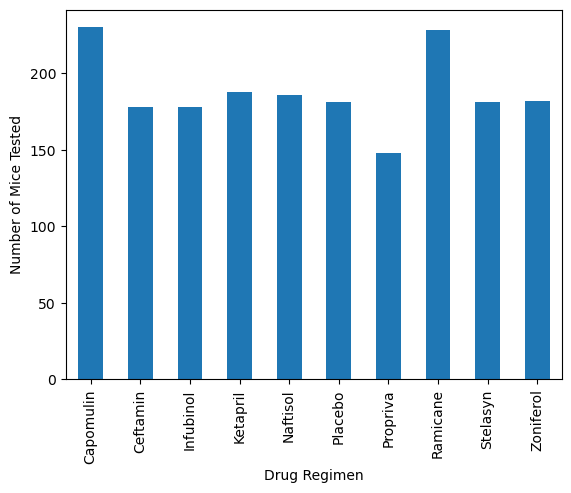

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_counts = clean_df.groupby('Drug Regimen')['Timepoint'].count()

# Create the bar plot
timepoint_counts.plot(kind='bar')

# Set the axis labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)

# Show the plot
plt.show()

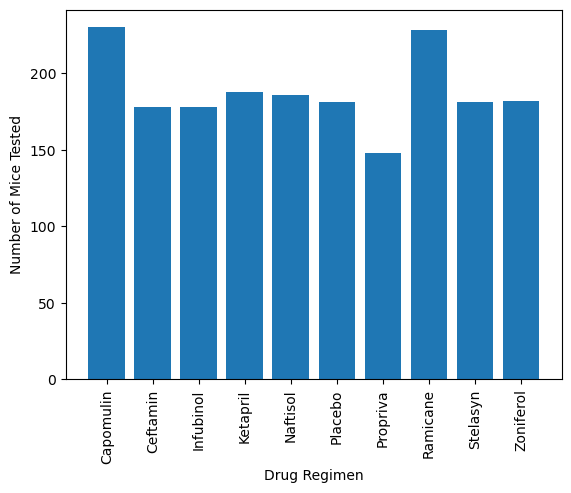

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_counts = clean_df.groupby('Drug Regimen')['Timepoint'].count()

# Create the bar plot
plt.bar(timepoint_counts.index, timepoint_counts.values)

# Set the axis labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)

# Show the plot
plt.show()


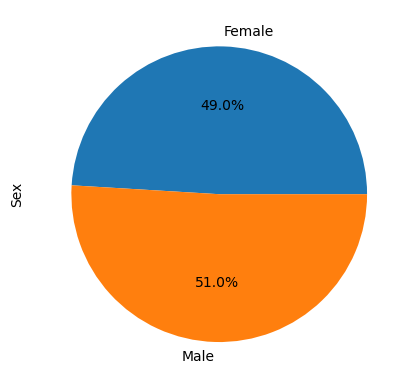

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df.groupby('Sex')["Sex"].count()

# create the pie plot
sex_counts.plot(kind='pie', autopct='%1.1f%%')

# show the plot
plt.show()


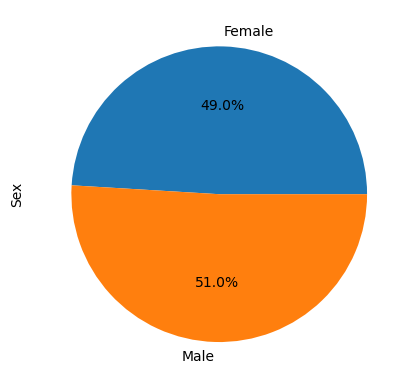

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_df.groupby('Sex')['Sex'].count()

# create the pie plot using Pyplot
plt.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')

plt.ylabel('Sex')

# show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_mouse = clean_df.groupby('Mouse ID')
max_series = group_mouse["Timepoint"].max()
max_df = pd.DataFrame(max_series)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_df = pd.merge(clean_df, max_df, on=['Mouse ID', 'Timepoint'])
merged_last_df = merged_last_df.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})
Filter_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
merged_last_df = merged_last_df[(merged_last_df["Drug Regimen"] == "Capomulin") | 
               (merged_last_df["Drug Regimen"] == "Ramicane") | 
               (merged_last_df["Drug Regimen"] == "Infubinol") | 
               (merged_last_df["Drug Regimen"] == "Ceftamin")]

#Reset Index
merged_last_df = merged_last_df.reset_index(drop=True)
merged_last_df

,Mouse ID,Timepoint,Final Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [18]:
merged_last_df["Drug Regimen"].unique()

array(['Capomulin', 'Infubinol', 'Ramicane', 'Ceftamin'], dtype=object)

In [19]:
# Put treatments into a list
drug_regimens = merged_last_df['Drug Regimen'].unique().tolist()

#Empty list is created to fill with tumor volume data
tumor_volume_Capomulin = []
tumor_volume_Ramicane = []
tumor_volume_Infubinol = []
tumor_volume_Ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimens:
    filtered_df = merged_last_df[merged_last_df['Drug Regimen'] == drug]
    quartiles = filtered_df['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq,2)
    print(f"The lower quartile of volume for {drug} is: {lowerq}")
    print(f"The upper quartile of volume for {drug} is: {upperq}")
    print(f"The interquartile range of volume for {drug} is: {iqr}")
# Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f"For {drug}, values below {lower_bound} could be outliers.")
    print(f"For {drug}, values  above {upper_bound} could be outliers.")
    low_out = []
    high_out = []
    for value in filtered_df['Final Tumor Volume (mm3)']:
        if value < lower_bound:
            low_out.append(value)
        elif value > upper_bound:
            high_out.append(value)
            
    print(f"Low end outliers: {low_out}")
    print(f"High end outliers: {high_out}")
    print("----------------------------------------------------------")


#Locate the rows which contain mice on each drug and get the tumor volumes
tumor_volume_Capomulin = merged_last_df.loc[merged_last_df['Drug Regimen'] == 'Capomulin', 'Final Tumor Volume (mm3)'].values.tolist()
tumor_volume_Ramicane = merged_last_df.loc[merged_last_df['Drug Regimen'] == 'Ramicane', 'Final Tumor Volume (mm3)'].values.tolist()
tumor_volume_Infubinol = merged_last_df.loc[merged_last_df['Drug Regimen'] == 'Infubinol', 'Final Tumor Volume (mm3)'].values.tolist()
tumor_volume_Ceftamin = merged_last_df.loc[merged_last_df['Drug Regimen'] == 'Ceftamin', 'Final Tumor Volume (mm3)'].values.tolist()
    

The lower quartile of volume for Capomulin is: 32.38
The upper quartile of volume for Capomulin is: 40.16
The interquartile range of volume for Capomulin is: 7.78
For Capomulin, values below 20.71 could be outliers.
For Capomulin, values  above 51.83 could be outliers.
Low end outliers: []
High end outliers: []
----------------------------------------------------------
The lower quartile of volume for Infubinol is: 54.05
The upper quartile of volume for Infubinol is: 65.53
The interquartile range of volume for Infubinol is: 11.48
For Infubinol, values below 36.83 could be outliers.
For Infubinol, values  above 82.75 could be outliers.
Low end outliers: [36.3213458]
High end outliers: []
----------------------------------------------------------
The lower quartile of volume for Ramicane is: 31.56
The upper quartile of volume for Ramicane is: 40.66
The interquartile range of volume for Ramicane is: 9.1
For Ramicane, values below 17.91 could be outliers.
For Ramicane, values  above 54.31 

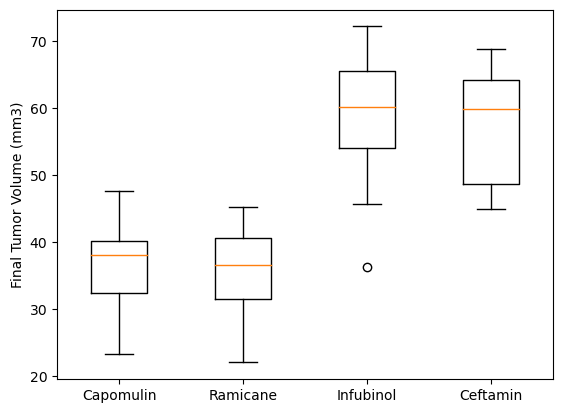

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [
    tumor_volume_Capomulin,
    tumor_volume_Ramicane,
    tumor_volume_Infubinol,
    tumor_volume_Ceftamin
]

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Create the box plot with the data
ax.boxplot(data)

# Add labels and title
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

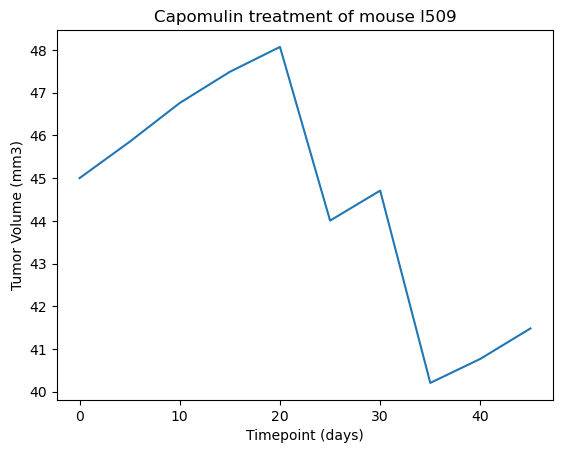

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timepoints_l509 = clean_df.loc[clean_df['Mouse ID'] == 'l509', 'Timepoint'].values.tolist()
vol_l509 = clean_df.loc[clean_df['Mouse ID'] == 'l509', 'Tumor Volume (mm3)'].values.tolist()
plt.plot(timepoints_l509,vol_l509)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')


In [22]:
clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', "Weight (g)"].nunique()

9

Text(0, 0.5, 'Average Tumor Volume (mm3)')

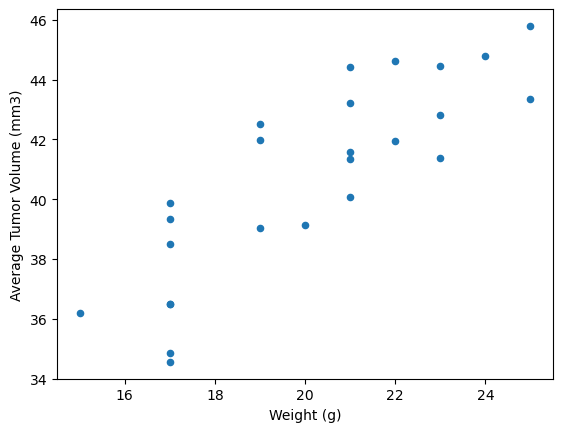

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
group_weight = clean_df[clean_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')
mean_series = group_weight.mean()
mean_df = pd.DataFrame(mean_series)
mean_df = mean_df.reset_index()
mean_df
mean_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

R Value between mouse weight and the average tumor volume is 0.84


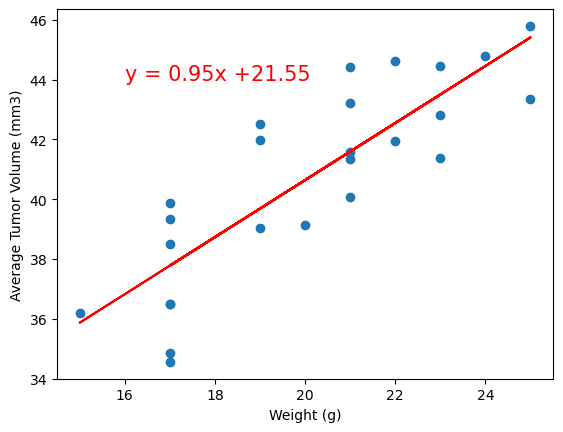

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mean_df['Weight (g)']
y_values = mean_df['Tumor Volume (mm3)']

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Create Line Equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(16,44),fontsize=15,color="red")

# Print r value
r_squared = r2_score(y_values, regress_values)
print(f"R Value between mouse weight and the average tumor volume is {round(rvalue,2)}")

# Show plot
plt.show()